In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [3]:
print("Movies:")
print(movies.head())

print("\nRatings:")
print(ratings.head())

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [4]:
merged_df = pd.merge(ratings, movies, on='movieId')
print("\nMerged DataFrame:")
print(merged_df.head())


Merged DataFrame:
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [5]:
merged_df['parsed_time'] = pd.to_datetime(merged_df['timestamp'], unit='s')
print("\nDataFrame sau khi thêm cột parsed_time:")
print(merged_df[['userId', 'movieId', 'rating', 'parsed_time']].head())


DataFrame sau khi thêm cột parsed_time:
   userId  movieId  rating         parsed_time
0       1        1     4.0 2000-07-30 18:45:03
1       1        3     4.0 2000-07-30 18:20:47
2       1        6     4.0 2000-07-30 18:37:04
3       1       47     5.0 2000-07-30 19:03:35
4       1       50     5.0 2000-07-30 18:48:51


In [6]:
merged_df['result'] = np.where(merged_df['rating'] >= 3, 'up', 'down')
print("\nDataFrame sau khi thêm cột result:")
print(merged_df[['userId', 'movieId', 'rating', 'result']].head())


DataFrame sau khi thêm cột result:
   userId  movieId  rating result
0       1        1     4.0     up
1       1        3     4.0     up
2       1        6     4.0     up
3       1       47     5.0     up
4       1       50     5.0     up


In [7]:
print("\nThống kê số lượng phim được đánh giá cao (up) và thấp (down):")
print(merged_df['result'].value_counts())


Thống kê số lượng phim được đánh giá cao (up) và thấp (down):
result
up      81763
down    19073
Name: count, dtype: int64


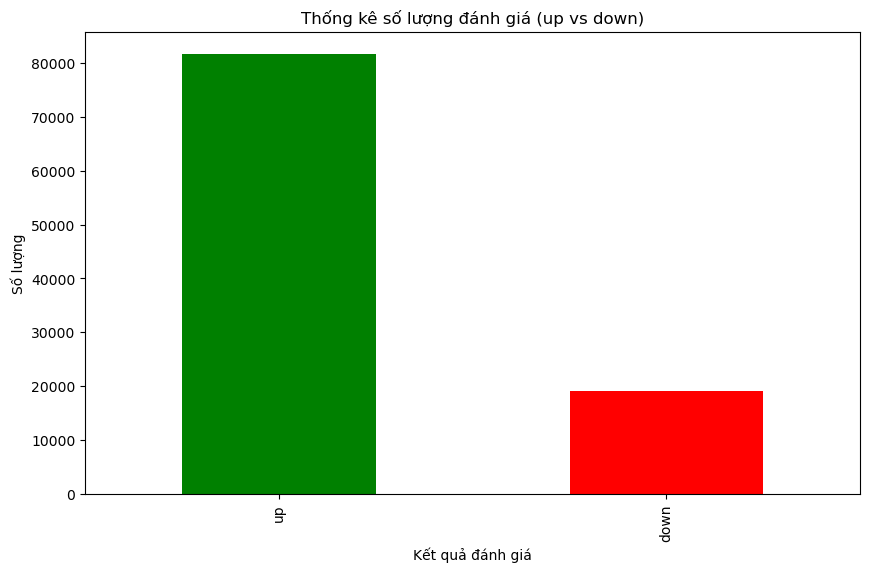

In [8]:
plt.figure(figsize=(10, 6))
merged_df['result'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Thống kê số lượng đánh giá (up vs down)")
plt.xlabel("Kết quả đánh giá")
plt.ylabel("Số lượng")
plt.show()